In [2]:
using DelimitedFiles

A = readdlm("../dat/profits.txt", ',')

97×2 Array{Float64,2}:
  6.1101  17.592  
  5.5277   9.1302 
  8.5186  13.662  
  7.0032  11.854  
  5.8598   6.8233 
  8.3829  11.886  
  7.4764   4.3483 
  8.5781  12.0    
  6.4862   6.5987 
  5.0546   3.8166 
  5.7107   3.2522 
 14.164   15.505  
  5.734    3.1551 
  ⋮               
  8.5172   4.2415 
  9.1802   6.7981 
  6.002    0.92695
  5.5204   0.152  
  5.0594   2.8214 
  5.7077   1.8451 
  7.6366   4.2959 
  5.8707   7.2029 
  5.3054   1.9869 
  8.2934   0.14454
 13.394    9.0551 
  5.4369   0.61705

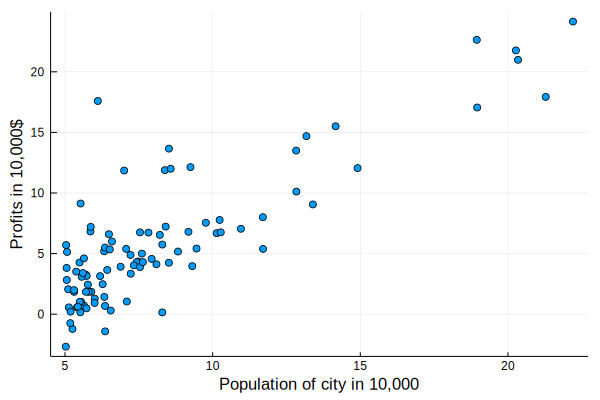

In [4]:
using Plots

scatter(A[:,1], A[:,2], xlabel="Population of city in 10,000", ylabel="Profits in 10,000\$", label="")

In [7]:
N = size(A,1)
y = A[:,2]
X = hcat(ones(N), A[:,1])
# Last week: normal equation to fit \theta (for checking result)
θ = inv(X'*X)*X'*y

2-element Array{Float64,1}:
 -3.895780878311886 
  1.1930336441895961

In [18]:
# This week: try to implement Gradient Descent algorithm to find theta.
# Batch Gradient Descent
function bgd(X, y, α = 0.01, maxIters = 2000)::Array{Float64,2}
    N, D = size(X)
    θ = zeros(D, maxIters)
    for t = 1:maxIters-1
        ∇ = X'*(X*θ[:,t] - y)/N
        θ[:,t+1] = θ[:,t] - α*∇
    end
    θ
end


bgd (generic function with 3 methods)

In [22]:
θs = bgd(X, y, 0.01, 2000)

2×2000 Array{Float64,2}:
 0.0  0.0583914  0.0628918  0.0578229  …  -3.78748  -3.78768  -3.78787
 0.0  0.653288   0.77001    0.791348       1.18215   1.18217   1.18219

In [23]:
# The loss function of the linear regression model
function loss(X, y, θ)
    u = X*θ - y
    u'*u/length(y)
end

loss (generic function with 1 method)

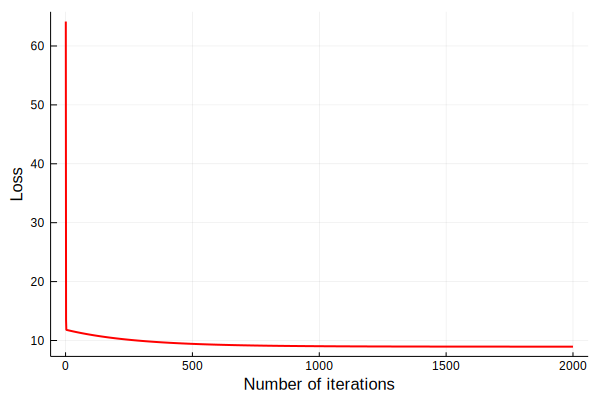

In [28]:
J = map(j -> loss(X, y, θs[:,j]), collect(1:2000))
iters = collect(1:2000)
plot(iters, J, label="", xlabel="Number of iterations", ylabel="Loss", linewidth=2, color=:red)

In [30]:
println("The best theta = ", θs[:,2000])

The best theta = [-3.7878740603439502, 1.1821932338790497]


(51, 201)
(51, 201)


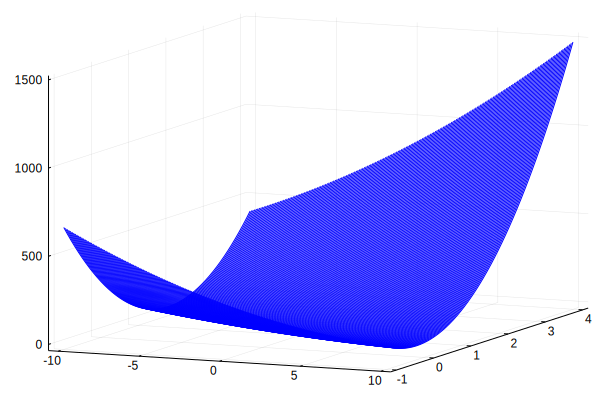

In [47]:
θ_0 = -10:0.1:10
θ_1 = -1:0.1:4

U = repeat(reshape(θ_0, 1, :), length(θ_1), 1)
println(size(U))
V = repeat(θ_1, 1, length(θ_0))
println(size(V))
f(u, v) = begin
    θ = [u; v]
    loss(X, y, θ)
end

J = map(f, U, V)
plot3d(U, V, J, label="", color=:blue)


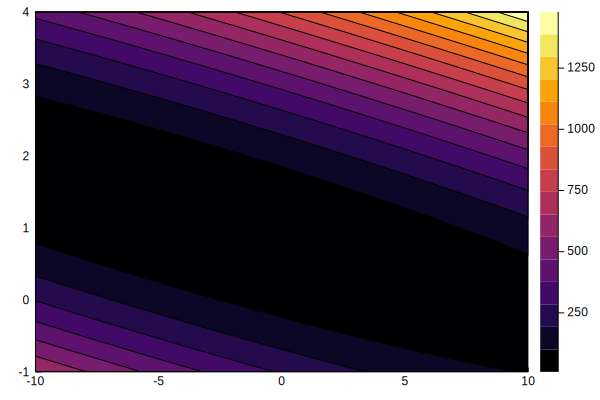

In [50]:
contour(θ_0, θ_1, J, fill=true)

In [ ]:
# Exercise: Implement SGD (Stochastic Gradient Descent) and compare to BGD.
# Read the Logistic Regression lecture